In [1]:
import pandas as pd

In [2]:
#задание 1
rate = pd.read_csv('ratings.csv')

In [4]:
def rating(rat):
    if rat <= 2:
        return 'низкий рейтинг'
    if rat <= 4:
        return 'средний рейтинг'
    return 'высокий рейтинг'

In [6]:
rate['mark'] = rate['rating'].apply(rating)
rate.head()

,userId,movieId,rating,timestamp,mark
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг


In [11]:
#задание 2
data = pd.read_csv('keywords.csv')
geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [12]:
def location(phrase):
    for region, cities in geo_data.items():
        for city in cities:
            if city in phrase.split(' '):
                return region
    return 'undefined'

In [13]:
data['region'] = data['keyword'].apply(location)
data[data.region != 'undefined']

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток
1236,банк санкт петербург,174375,Северо-Запад
...,...,...,...
99292,афиша кино москва на сегодня,3704,Центр
99590,авито ярославль автомобили с пробегом,3673,Центр
99808,полармед мурманск запись на прием,3719,Северо-Запад
99890,яндекс метро москва,4548,Центр


In [14]:
data

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined
...,...,...,...
99995,эльдорадо старый оскол,3705,undefined
99996,frigate для firefox,3630,undefined
99997,укрсиб,3630,undefined
99998,погода в ялте на неделю,3688,undefined


In [25]:
#задание 3
rate = pd.read_csv('ratings.csv')
films = pd.read_csv('movies.csv')

In [43]:
def release_year(title):
    res = title.split(' ')
    for i in range(1950, 2011):
        if '(' + str(i) + ')' in res:
            return i
    return 1900

In [22]:
rate
#films

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [44]:
films['year'] = films['title'].apply(release_year)
mer = pd.merge(rate, films, how='inner', on='movieId')
mer.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,1995
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,1995
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,1995
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,1995


<AxesSubplot:xlabel='year'>

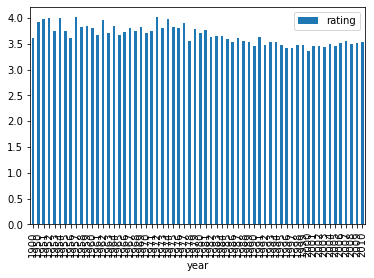

In [50]:
hist = mer[['rating', 'year']].groupby('year').mean()
hist.plot(kind="bar")

In [52]:
hist.sort_values(by='rating')

,rating
year,
2000,3.355945
1997,3.415764
1996,3.426600
2003,3.444777
2005,3.448434
...,...
1951,3.983539
1954,3.994220
1952,4.000000
